# Корреляция и регрессия

## Типы взаимосвязей: функциональная и корреляционная взаимосвязь

С позиции статистической обработки данных можно выделить 2 типа взаимосвязей:

1.   Функциональная взаимосвязь <br>
  Каждому значению одной величины соответствует одно (или несколько) строго опредеоленное значение другой величины.
2.   Корреляционная взаимосвязь. <br>
  ***Статистическая*** взаимосвязь двух случайных величины, при этом изменение значений одной случайной величины приводит к систематическому изменению значений другой величины.



### Пример функциональной взаимосвязи



Функциональная взаимосвязь может быть выражена в виде математической функции, либо таблицы, где каждому значению одной величиных строго соотвествует значение другой величины. В качестве примера функциональной взаимосвязи можно привести зависимость площади квадрата от длины сторон квадарата.

In [ ]:
import pandas as pd

df_squares = pd.DataFrame(
    {
        'length_a': [1, 2, 5, 7, 8]
    }
)
df_squares

,length_a
0,1
1,2
2,5
3,7
4,8


In [ ]:
# Мы можем найти функцию, которая связывает длину и площадь квадрата
df_squares['s'] = df_squares['length_a'] ** 2
df_squares['s']

0     1
1     4
2    25
3    49
4    64
Name: s, dtype: int64

In [ ]:
# Каждому значению 'length_a' соответствует строго определенное значение 's'
df_squares

,length_a,s
0,1,1
1,2,4
2,5,25
3,7,49
4,8,64


### Пример корреляционной взаимосвязи

В качестве примера корреляционной взаимосвязи можно привести связь роста и веса человека. Опыт подсказывает нам, что рост и вес взаимосвязаны, но при этом на рос и на вес могут влиять генетические факторы и факторы окружающей среды. <br>
Датасет: https://www.kaggle.com/mustafaali96/weight-height

In [ ]:
df_anthro = pd.read_csv('weight-height.csv')
df_anthro.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [ ]:
# Данные представлены в дюймах и фунтах,
# переведем переменные в метрическую систему
df_anthro['height_sm'] = df_anthro['Height'] * 2.54
df_anthro['weight_kg'] = df_anthro['Weight'] / 2.20462

In [ ]:
df_anthro.head(10)

,Gender,Height,Weight,height_sm,weight_kg
0,Male,73.847017,241.893563,187.571423,109.721205
1,Male,68.781904,162.310473,174.706036,73.622879
2,Male,74.110105,212.740856,188.239668,96.497744
3,Male,71.730978,220.042470,182.196685,99.809704
4,Male,69.881796,206.349801,177.499761,93.598806
5,Male,67.253016,152.212156,170.822660,69.042355
6,Male,68.785081,183.927889,174.714106,83.428386
7,Male,68.348516,167.971110,173.605229,76.190505
8,Male,67.018950,175.929440,170.228132,79.800347
9,Male,63.456494,156.399676,161.179495,70.941784


### Диаграмма рассеяния (scatterplot)

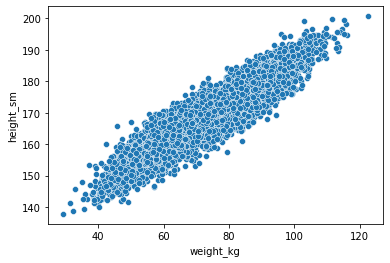

In [ ]:
import seaborn as sns
sns.scatterplot(x=df_anthro['weight_kg'], y=df_anthro['height_sm'])

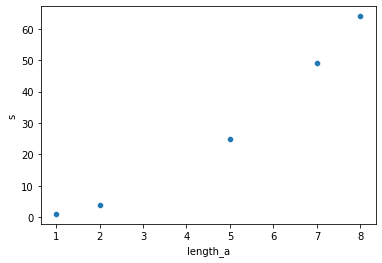

In [ ]:
sns.scatterplot(x=df_squares['length_a'], y=df_squares['s'])

## Коэффициент корреляции

На графиках мы можем увидить взаимосвязи двух величин, но как их можно представить в виде числа. Для этого можно использовать коэффициент корреляции Пирсона.
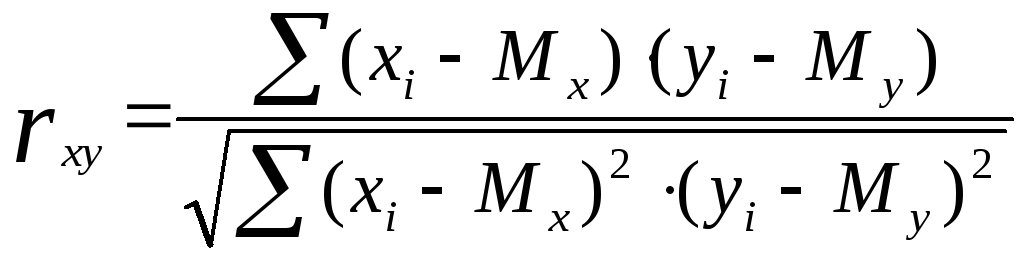

Следует отметить, что получаемый коэффициент корреляции принаждлежит интервалу \[-1; 1].

Рассчитаем коэффициент корреляции для переменных 'weight_kg' и 'height_sm'

In [ ]:
# Это можно сделать средствами pandas
# По умолчанию рассчитывается коэф. корреляции Пирсона
df_anthro[['weight_kg', 'height_sm']].corr()

,weight_kg,height_sm
weight_kg,1.000000,0.924756
height_sm,0.924756,1.000000


В данном случае мы получили так называемую матрицу корреляций, где указаны рассчитанные коэффициенты корреляции для каждой пары значений в датасете.

In [ ]:
# Матрица корреляций для всего датасета
df_anthro.corr()

,Height,Weight,height_sm,weight_kg
Height,1.000000,0.924756,1.000000,0.924756
Weight,0.924756,1.000000,0.924756,1.000000
height_sm,1.000000,0.924756,1.000000,0.924756
weight_kg,0.924756,1.000000,0.924756,1.000000


### Как интерпретировать полученный коэффициент корреляции?

Первое, что необходимо интерпретировать - это направление корреляционной взаимосвязи.
1. Прямая коррелляция - при изменении одного значения случайной величины, другая изменяется сонапраленно (при увеличении одной величины другая тоже увеличивается). Коэффициент корреляции **положительный**.
2. Обратная корреляция - при изменении одного значения случайной величины, другая изменяется в противоположную сторону (при увеличении одной величины другая уменьшается).Коэффициент корреляции **отрицательный**.

Также нам интересно насколько сильна корреляционная взаимосвязь. Для оценки силы взаимосвязи широко используется шкала Чеддока.

![linejnyj_koefficient_korrelyacii_clip_image076[1].jpg](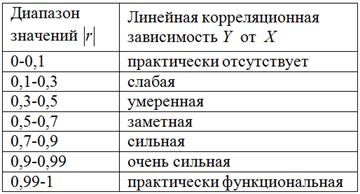)
<br>
Источник: http://mathprofi.ru/linejnyj_koefficient_korrelyacii.html

Полученный нами коэффициент корреляции 0.92 можно интерпертировать как **сильную** **прямую** корреляционную взаимосвязь

In [ ]:
# Рассмотрим насколько сильно коррелируют значения длины и площади квадрата
df_squares.corr()

,length_a,s
length_a,1.00000,0.98339
s,0.98339,1.00000


Почему в данном члучае коэффициент корреляции не равен 1? У нас ведь функциональная взаимосвязь! Дело в том, что коэффициент корреляции Пирсона дает верную оценку только для **линейных** корреляционных взаимосвязей.

In [ ]:
# В некоторых случаях ситуацию возможно исправить
# при помощи преобразования переменных к линейному виду
df_squares['root_s'] = df_squares['s'] ** 0.5
df_squares[['length_a', 'root_s']].corr()

,length_a,root_s
length_a,1.0,1.0
root_s,1.0,1.0


В результате того, что мы взяли корень от значения площади квадрата мы получили линейную зависимость.

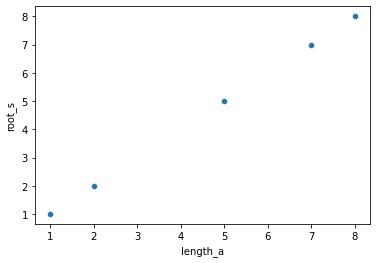

In [ ]:
sns.scatterplot(x=df_squares['length_a'], y=df_squares['root_s'])

Как выглядят диаграммы рассеяния при разных типах корреляционной взаимосвязи <br>
![corr1[1].png](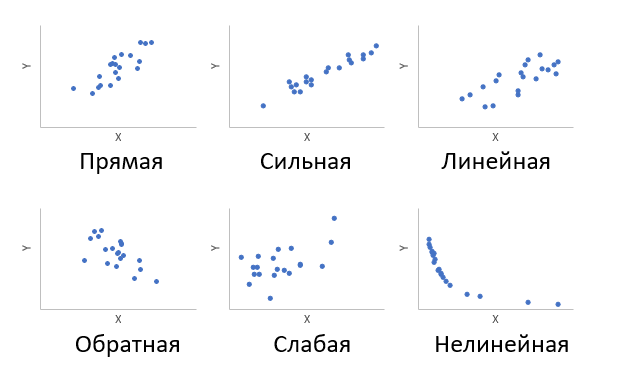)
<br>
Источник: https://statanaliz.info/statistica/korrelyaciya-i-regressiya/linejnyj-koefficient-korrelyacii-pirsona/

### Интуиция за формулой коэффициента корреляции

Вернемся к диаграмме рассеяния роста и веса людей из датасета.

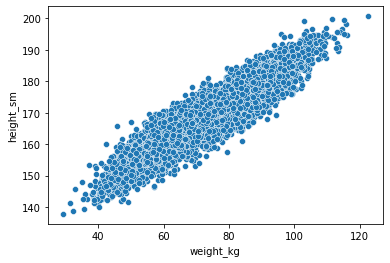

In [ ]:
import seaborn as sns
sns.scatterplot(x=df_anthro['weight_kg'], y=df_anthro['height_sm'])

Вычтем из текущих значений веса и роста соответствующие средние, чтобы отнормировать диаграмму так, чтобы оси диаграммы проходили через средние значения.

In [ ]:
df_anthro['weight_diff'] = df_anthro['weight_kg'] - df_anthro['weight_kg'].mean()
df_anthro['height_diff'] = df_anthro['height_sm'] - df_anthro['height_sm'].mean()

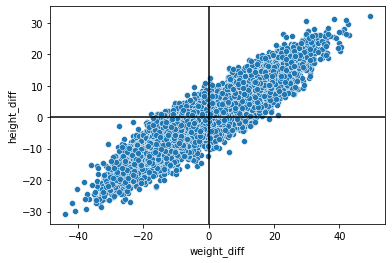

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(x=df_anthro['weight_diff'], y=df_anthro['height_diff'])
plt.axhline(0, color='black')
plt.axvline(0, color='black')

Теперь все значения мы можем отнести к 4 группам:
1. И рост и вес больше среднего
2. И рост и вес ниже среднего
2. Вес больше среднего, рост ниже среднего
4. Рост больше среднего, вес ниже среднего
<br>
Если бы взаимосвязи между двумя переменными не было, количество значений в группах 1 + 2 и 3 + 4 было бы примерно одинаковым. Посмотрим это на примере

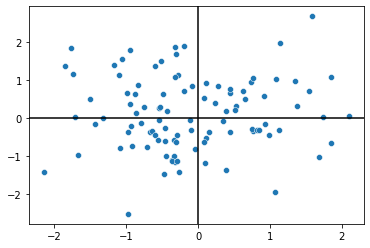

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
sns.scatterplot(x=np.random.normal(0, 1, 100), y=np.random.normal(0, 1, 100))
plt.axhline(0, color='black')
plt.axvline(0, color='black')

В группы 1 и 2 значения попадают только в том случае, если разница между текущим значением и средним для обоих переменных либо положительная, либо отрицательная. Это условие можно получить если мы перемножим оба значения.

In [ ]:
df_anthro['group_1_2'] = (df_anthro['weight_diff'] * df_anthro['height_diff']) > 0
df_anthro['group_1_2'].head(4)

0    True
1    True
2    True
3    True
Name: group_1_2, dtype: bool

In [ ]:
Теперь посмотрим

Теперь посмотрим на наш график с группировкой по знаку произведения разниц между значением в датасете и среднего значения для двух величин.

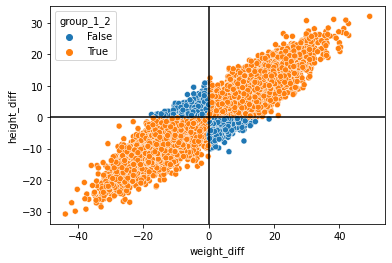

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(
    x=df_anthro['weight_diff'],
    y=df_anthro['height_diff'],
    hue=df_anthro['group_1_2']
)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

Если суммировать все значения, то мы можем получить оценку направленности нашей взаимосвязи (числитель в формуле коэффициента корреляции Пирсона). <br>
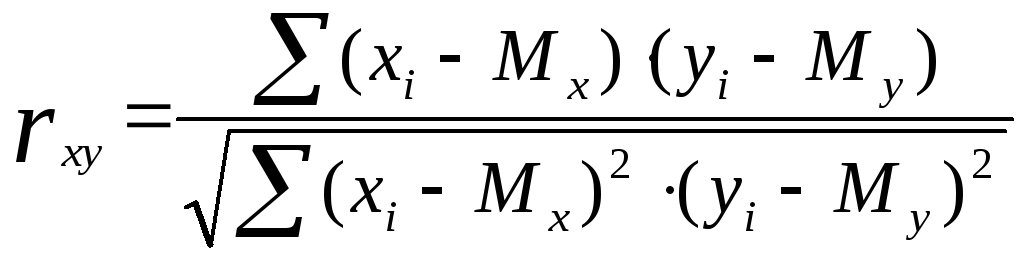

Знаменатель в данной формуле позволяет нормализовать значение в числителе таким образом, чтобы оно находилось в диапазоне между -1 и 1.

## Ранговый коэффициент корреляции Спирмена

Представим себе ситуацию, когда среди значений в датасете появились выбросы. попробуем рассчитать коэффициент корреляции Пирсона снова.

In [ ]:
df_anthro_outlier = df_anthro.append({'height_sm': 160, 'weight_kg': 998}, ignore_index=True)
df_anthro_outlier.tail(5)

,Gender,Height,Weight,height_sm,weight_kg,weight_diff,height_diff,group_1_2
9996,Female,67.067155,170.867906,170.350573,77.504471,4.276269,1.776971,1.0
9997,Female,63.867992,128.475319,162.224700,58.275494,-14.952708,-6.348902,1.0
9998,Female,69.034243,163.852461,175.346978,74.322315,1.094114,6.773376,1.0
9999,Female,61.944246,113.649103,157.338385,51.550427,-21.677774,-11.235217,1.0
10000,NaN,NaN,NaN,160.000000,998.000000,NaN,NaN,NaN


In [ ]:
df_anthro_outlier[['height_sm', 'weight_kg']].corr()

,height_sm,weight_kg
height_sm,1.000000,0.775943
weight_kg,0.775943,1.000000


In [ ]:
df_anthro[['height_sm', 'weight_kg']].corr()

,height_sm,weight_kg
height_sm,1.000000,0.924756
weight_kg,0.924756,1.000000


Всего лишь один выброс значительно изменил коэффициент корреляции. Выбросоустойчивым аналогом коэффициента корреляции Пирсона является коэффициент корреляции Спирмена. <br>
![img_5abd2a6b81a43[1].png](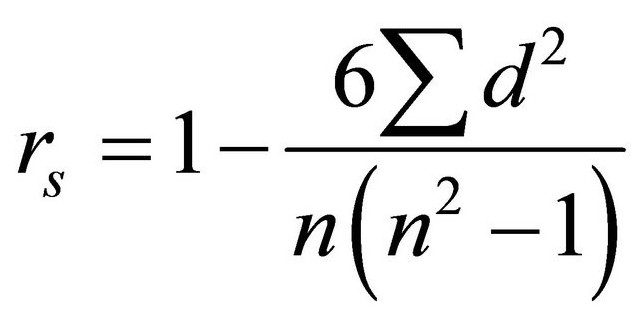)

Данный коэффициент основан на том, что мы каждому из исследуемых значений присваиваем ранг. d - это разница рангов, которая и определяет знак в коэффициенте корреляции Спирмена.

In [ ]:
# Pandas позволяет нам таже рассчитать и коэффициент корреляции Спирмена
df_anthro_outlier[['height_sm', 'weight_kg']].corr(method='spearman')

,height_sm,weight_kg
height_sm,1.000000,0.925346
weight_kg,0.925346,1.000000


In [ ]:
df_anthro[['height_sm', 'weight_kg']].corr(method='spearman')

,height_sm,weight_kg
height_sm,1.000000,0.925708
weight_kg,0.925708,1.000000


# Регрессия

## Метод наименьших квадратов

У нас получилось найти взаимосвязь между весом и ростом человека. Мы смогли определить ее направление и силу. Но возможно ли, например, зная рост человека определить его вес, используя наши данные?

Да, Это возможно. Для этого необходимо создать математическую модель.

Математическая модель - способ описания реальности при помощи математических методов.

Модель не является копией объекта и нет необходимости учитывать абсолютно **ВСЕ** факторы при моделировании. Нужно помнить, что модель создается для достижения какой-либо конкретной цели с определенной точностью.

Ошибка предсказания модели, реальные значения и предсказания модели связаны следующей формулой

<h1> eᵢ = yᵢ - ŷ </H1>
eᵢ - случайная ошибка модели <br>
yᵢ - фактическое значение <br>
ŷ - прогноз модели <br>

Обратите внимание на то, что существуют случайные ошибки (error), для которых характерно распределение близкое к нормальному, их сумма близка к нулю. Есть также и систематические ошибки (bias), которые могут иметь любое другое распределение, при этом они могут смещать прогнозы модели. <br>
Примерами случайных ошибок может быть погрешность измерения прибора, либо результат при округлении значений. Примером систематической ошибки может являться линейка, у которой деление в 10 мм имеет фактическую длину 9 мм, из-за чего все измерения будут отличаться в меньшую сторону от фактического.

Мы выяснили, что рост и вес человека характеризуются линейной зависимостью. И мы хотим построить линейную модель, которая будет прогнозировать **вес человека** (целевая переменная, таргет, зависимая переменная) *по его росту* (признак модели, предиктор, независимая переменная).

Модель линейной регрессии можно выразить таким способом:
![img-Uy_8ZH[1].png](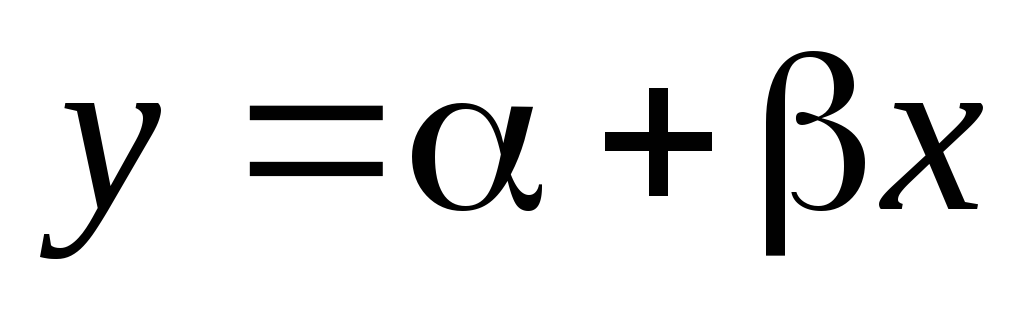)

y - предсказание модели (в нашем случае - вес в кг) <br>
α - свободный член <br>
β - коэффициент при предикторе x <br>
x - предиктор (в нашем случае - рост в см)

![image234[1].jpg](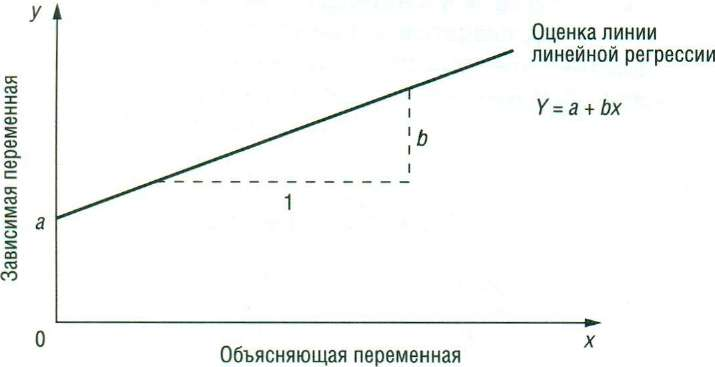)

Мы не можем провести прямую линию через 10 тысяч точек, в том случае, если они не расположены на одной прямой. Однако мы можем найти такую прямую, при которой ошибка предсказания модели будет минимальной.

Для оценки ошибок на всем датасете мы будем суммировать все ошибки. Мы помним, что случайная ошибка модели симметрична около 0, поэтому, если мы суммируем все ошибки положительные и отрицательные ошибки взаимоуничтожатся и мы получим 0. Чтобы этого избежать мы возводим обе части уравнения в квадрат.

∑eᵢ<sup>2</sup> = ∑(yᵢ - ̂y)<sup>2</sup> <br>

Заменим ŷ на обобщенную формулу для линейной модели <br>
∑eᵢ<sup>2</sup> = ∑(yᵢ - ̂(α + βX + β<sub>2</sub>X<sub>2</sub>))<sup>2</sup> <br>
В результате мы получили так называемую функцию потерь для задачи линейной регрессии.

Если приравнять эту функцию к 0 и посчитать частные производные для свободного члена и коэффициентах при предикторах, то можно будет получить систему уравнений из которой возомжно будет найти свободный член и предикторы. <br>
![image011[1].jpg](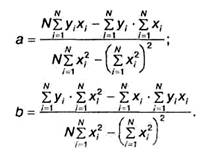)

В результате получаем уравнение прямой, для которой сумма квадаратов ошибок минимальна.

![839[1].png](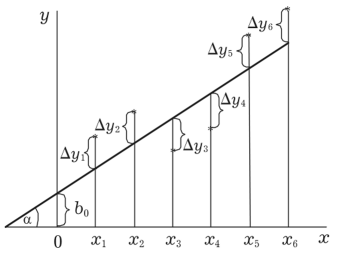)

## Пример с парной регрессией по росту и весу

In [ ]:
import pandas as pd
# Загружаем датасет
df_anthro = pd.read_csv('weight-height.csv')
# Подготавливаем переменные для анализа
df_anthro['height_sm'] = df_anthro['Height'] * 2.54 # переводим в см
df_anthro['weight_kg'] = df_anthro['Weight'] / 2.20462 # переводим в кг
df_anthro

Наши исходные данные (предиктор и таргет) должны обладать следующими свойствами, чтобы получить качественную модель. <br>


1.   Переменные линейнозависимые (если нет, то можно преобразовать текущую переменную к линейному виду)
2.   Нормальное распределение остатков модели
3.   Гомоскедастичность (дисперсия признаков и таргета постоянна на любом интервале)
4.   Нормальность распределения (? не всегда это достижимо на практике)
5.   Отсутствие мультиколлинеарности (если предикторов несколько, то они не коррелируют друг с другом)



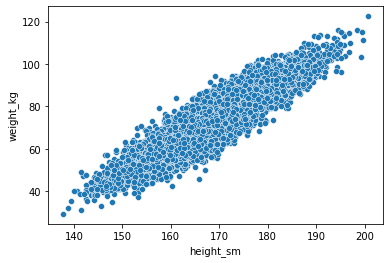

In [ ]:
# Посмотрим еще раз на диаграмму рассеяния значений роста и веса
import seaborn as sns
sns.scatterplot(y=df_anthro['weight_kg'], x=df_anthro['height_sm'])

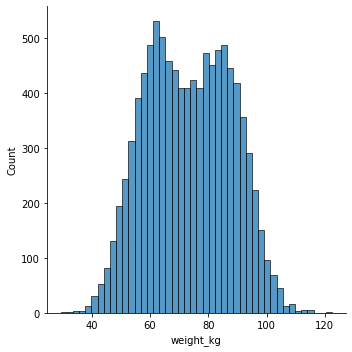

In [ ]:
# Теперь посмотрим на гистограммы распределения значений веса и роста
sns.displot(df_anthro['weight_kg'])

In [ ]:
# Проводим статистический тест на нормальность (Liliefors)
from statsmodels.stats.diagnostic import lilliefors
lilliefors(df_anthro['weight_kg']) # Отвергаем H0-гипотезу о нормальности распределения

(0.04893471585437409, 6.31598613118397e-63)

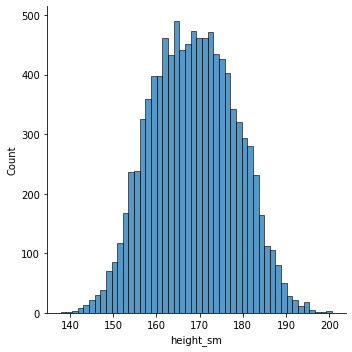

In [ ]:
# Теперь посмотрим на гистограммы распределения значений веса и роста
sns.displot(df_anthro['height_sm'])

In [ ]:
# Проводим статистический тест на нормальность (Liliefors)
from statsmodels.stats.diagnostic import lilliefors
lilliefors(df_anthro['height_sm']) # Отвергаем H0-гипотезу о нормальности распределения

(0.02554436054216841, 3.860309829346911e-16)

Переменные линейнозависимы ✔ <br>
Дисперсия постоянна ✔ (есть статистические тесты для проверки на гомоскедастичность) <br>
Переменные распределены нормально × (не все и не всегда происходит так как изначально задумывалось)

## Переобучение: обучающая и тестовая выборка

Для проверки модели нам необходимо оставить некоторую часть выборки, которую модель не получит пр обучении. Это необходимо для того, чтобы избежать слишком оптимистичных оценок метрик при переобучении

В некоторых случаях (неверно подобран датасет, проблемы при выборе модели и ее параметров) модель может очень точно предсказывать значения на которых она обучилась, но при обобщении модели на другие значения ее предсказательная способность будет низкой. Это происходит потому что модель "запоминает" те значения, которые были в тестовой выборке, находит те закономерности, которые не присущи генеральной совокупности. Это явление называется переобучением модель (overfit).
![0_gTv9mcZ5ycAINwtq[1].jpg](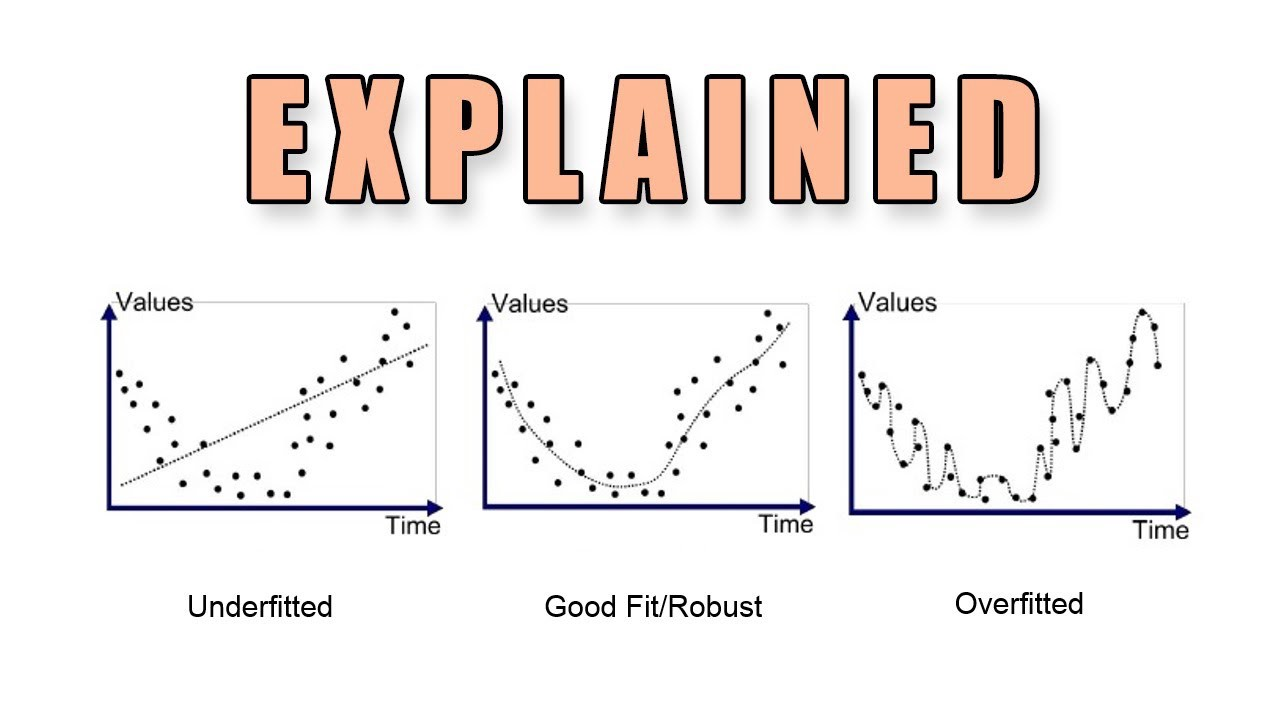)

In [ ]:
# Создаем обучающую и тестовую выборку
# Возьмем, например, случайные 70% значений для обучающей выборки
# Остальное пойдет в тестовую выборку
from sklearn.model_selection import train_test_split
# Указываем random_state для воспроизводимости
df_train, df_test = train_test_split(df_anthro, train_size=0.7, random_state=10)

# Созадим список нужных нам переменных
features = ['height_sm']
# Создаем отдельные датафреймы для предикторов и таргета
X_train = df_train[features]
Y_train = df_train['weight_kg']
X_test = df_test[features]
Y_test = df_test['weight_kg']

Все готово для обучения нашей модели

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Получаем коэффициенты модели
model.coef_

array([1.37953174])

In [ ]:
# Также можно получить и рассчитанный свободный член
model.intercept_

-159.40452518312267

In [ ]:
# Получим прогнозы модели, а затем посмотрим на диаграмме рассеяния на результаты
train_predictions = model.predict(X_train)
train_predictions

array([65.42799106, 74.07261354, 87.48787004, ..., 77.99334954,
       71.21954929, 81.96474832])

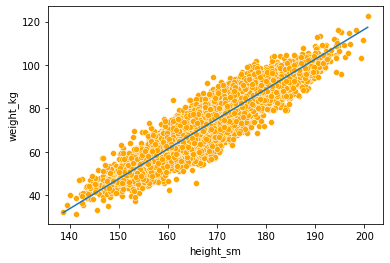

In [ ]:
sns.lineplot(y=train_predictions, x=X_train['height_sm'])
sns.scatterplot(y=Y_train, x=X_train['height_sm'], color='orange')

In [ ]:
# Используем основные метрики для оценки модели
# r2_score - коэффициент детерминации. Показывает долю дисперсии, которую объясняет данная модель
# mean_squared_error - средний квадрат ошибки (MSE). Функция потерь для данного метода. Чем меньше, тем лучше.
# mean_absolute_error - средняя абсолютная ошибка. Чем ближе к нулю, тем лучше.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(
f'''r^2 ------ {r2_score(Y_train, train_predictions)}
MSE ------ {mean_squared_error(Y_train, train_predictions)}
MAE ------ {mean_absolute_error(Y_train, train_predictions)}
'''
)

r^2 ------ 0.854726009772197
MSE ------ 30.546344369918774
MAE ------ 4.4106700646176575



In [ ]:
# Теперь необходимо получить метрики уже на тестовой выборке
test_predictions = model.predict(X_test)
test_predictions

array([ 79.99457056,  67.14629325, 100.01349083, ...,  60.64694545,
        62.42067268,  57.11220769])

In [ ]:
# Проводим аналогичную проверку на тесте
print(
f'''r^2 ------ {r2_score(Y_test, test_predictions)}
MSE ------ {mean_squared_error(Y_test, test_predictions)}
MAE ------ {mean_absolute_error(Y_test, test_predictions)}
'''
)

r^2 ------ 0.855897973861423
MSE ------ 31.135904665075515
MAE ------ 4.444466382350274



Выводы:


1.   Метрики на обучающей и валидационной выборке отличаются слабо, мы не обнаружили переобучение
2.   R^2 показывает, что 85,6% дисперсии признака "вес" может быть объяснено признаком "рост"
3.   MSE и MAE показываю, что в среднем на тестовой выборке мы ошибаемся примерно на 4.4 кг.

